# 7Ïû• ÌôïÎ•†Î∂ÑÌè¨

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## #.Ïù¥ÏÇ∞ÌôïÎ•†Î∂ÑÌè¨

### Ïù¥ÏÇ∞ÌôïÎ•†Î≥ÄÏàòÏóêÏÑú Îã§Î£¨ ÎÇ¥Ïö©(Ìï®Ïàò)
-Ïòà: Ï£ºÏÇ¨ÏúÑÎ•º ÎçòÏ°åÏùÑ Îïå 5ÎòêÎäî 6Ïù¥ ÎÇòÏò§Îäî Í≤ΩÏö∞ 

- ÏÉÅÌÉúÍ≥µÍ∞Ñ

In [2]:
# ex:Îëê Ï£ºÏÇ¨ÏúÑ ÎààÏù¥ Ï∞®Ïùò Ï†àÎåÄÍ∞í
d1 = [1,2,3,4,5,6]
d2 = [1,2,3,4,5,6]

X = list()
for i in d1:
    for j in d2:
        X.append(abs(i-j))
        
x_set = np.array(list(set(X)))

- ÌôïÎ•†ÏßàÎüâÌï®Ïàò: f(x)

In [3]:
def f(x):
    cnt = 0
    for i in d1:
        for j in d2:
            if abs(i-j) == x:
                cnt += 1
    return cnt / (len(d1)*len(d2))

- ÌôïÎ•†Î≥ÄÏàò

In [4]:
X = [x_set, f]

-  ÌôïÎ•†

In [5]:
prob = np.array([ f(x_k) for x_k in x_set])

---------------------------------------------------------------------

- ÌèâÍ∑†=Í∏∞ÎåÄÍ∞í(E(X))

In [6]:
def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set])

In [7]:
#g(x) Ìï®ÏàòÏãù ÏÇ¨Ïö©
def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

- Î∂ÑÏÇ∞(V(X))

In [8]:
def V(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

In [9]:
#g(x) Ìï®ÏàòÏãù ÏÇ¨Ïö©
def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

- ÌôïÎ•†ÏùÑ Ïù¥Ïö©Ìïú Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞ Ï∂úÎ†•

In [10]:
def check_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set])  
    
    print(f'Í∏∞ÎåÄÍ∞í E(X): {E(X):.4}')
    print(f'Î∂ÑÏÇ∞   V(X): {V(X):.4}')

- ÌôïÎ•†Î∂ÑÌè¨ Í∑∏ÎûòÌîÑ

In [11]:
def plot_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red') #Í∏∞ÎåÄÍ∞í:ÌèâÍ∑†
    ax.set_xticks(np.append(x_set, E(X)))  #xÏ∂ïÏùò Í∞í Ï∂úÎ†•
    ax.set_ylim(0, prob.max()*1.2)         #yÏ∂ïÏùò ÌïúÍ≥Ñ ÏßÄÏ†ï
    ax.legend()
    
    plt.show()    

### 1.Î≤†Î•¥ÎàÑÏù¥ Î∂ÑÌè¨(Bernoulli distribution)


In [14]:
def Bern(p):
    x_set = np.array([0,1])
    
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0

    return x_set, f

In [15]:
p = 1/3
X = Bern(p)
X

0.3333333333333333


(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

- ÌèâÍ∑†(Í∏∞ÎåÄÍ∞í)Í≥º Î∂ÑÏÇ∞

In [33]:
check_prob(X)

Í∏∞ÎåÄÍ∞í E(X): 0.3333
Î∂ÑÏÇ∞   V(X): 0.2222


- ÌôïÎ•†Î≥ÄÏàò X Í∑∏ÎûòÌîÑ

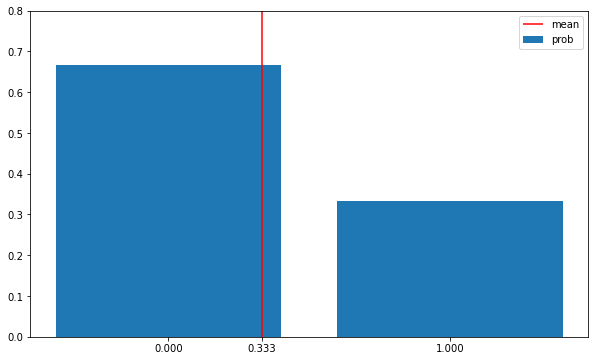

In [34]:
plot_prob(X)

### 2.Ïù¥Ìï≠Î∂ÑÌè¨(binomial distributuin)

In [26]:
#scipyÌå®ÌÇ§ÏßÄÏùò specialÎ™®ÎìàÏóê ÏûàÎäî combÌï®Ïàò ÏÇ¨Ïö©
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
        
    return x_set, f

In [44]:
n = 5    # nÏùò Í∞úÏàòÎ•º ÌÅ¨Í≤å Ìï¥Î≥¥Í∏∞ --> Í∑∏ÎûòÌîÑÍ∞Ä Ï¢ÖÎ™®ÏñëÏúºÎ°ú Î≥ÄÍ≤ΩÎê®
p = 0.25   # 0.3, 0.5, 0.7 Î≥ÄÍ≤ΩÌï¥Î≥¥Í∏∞
X = Bin(n,p)
X

(array([0, 1, 2, 3, 4, 5]), <function __main__.Bin.<locals>.f(x)>)

In [45]:
# Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞
check_prob(X)

Í∏∞ÎåÄÍ∞í E(X): 1.25
Î∂ÑÏÇ∞   V(X): 0.9375


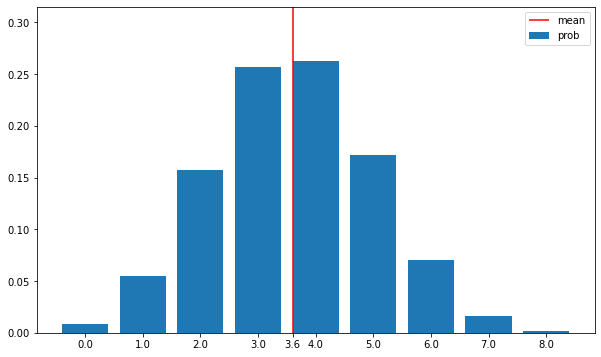

In [31]:
# Í∑∏ÎûòÌîÑ
plot_prob(X)

- [ÏòàÏ†ú]  Ïù¥Ìï≠Î∂ÑÌè¨ ÌôïÎ•† Íµ¨ÌïòÍ∏∞

ÏµúÍ∑ºÏùò Ìïú ÌÜµÍ≥ÑÏóê ÏùòÌïòÎ©¥ Ïö∞Î¶¨ÎÇòÎùº Í≥†Îì±ÌïôÏÉù Ï§ë 40%Í∞Ä Îã¥Î∞∞Î•º ÌîºÏö¥Îã§Í≥† Ï°∞ÏÇ¨ÎêòÏóàÎã§. ÎßåÏïΩ 6Î™ÖÏùò Í≥†Îì±ÌïôÏÉùÏùÑ Î¨¥ÏûëÏúÑÎ°ú Ï∂îÏ∂úÌïúÎã§Î©¥, Í∑∏ Ï§ëÏóêÏÑú 3Î™ÖÏù¥ Îã¥Î∞∞Î•º ÌîºÏö∏ ÌôïÎ•†ÏùÑ Íµ¨ÌïòÏãúÏò§

In [49]:
def prob(n, p, x):    
    return comb(n,x) * p**x * (1-p)**(n-x)
    
n = 6
p = 0.4
x = 3
prob(n, p, x)

0.27648

#### * scipy.statsÏóê ÏûàÎäî Ïù¥Ìï≠Î∂ÑÌè¨Ïùò (binom)Ìï®Ïàò ÏÇ¨Ïö©ÌïòÍ∏∞

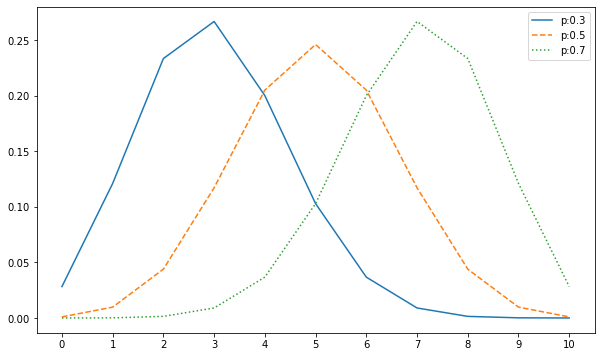

In [39]:
#Ïó¨Îü¨ ÌôïÎ•†Ïóê ÎåÄÌïú Ïù¥Ìï≠Î∂ÑÌè¨Î•º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ ÏÑ†Í∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÇ¥Í∏∞
from scipy import stats

fig = plt.figure(figsize=(10,6))
ax  = fig.add_subplot(111) # (1,1,1)

n = 10
linestyles = ['-','--',':']


x_set = np.arange(n+1)
p = [0.3,0.5,0.7]

for p, ls in zip(p, linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', linestyle=ls)

ax.set_xticks(x_set)
ax.legend()
    
plt.show()

### 3.Í∏∞ÌïòÎ∂ÑÌè¨(geometric distributuin)

In [52]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [53]:
p = 0.5
X = Ge(p)

In [54]:
#Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞
check_prob(X)

Í∏∞ÎåÄÍ∞í E(X): 2.0
Î∂ÑÏÇ∞   V(X): 2.0


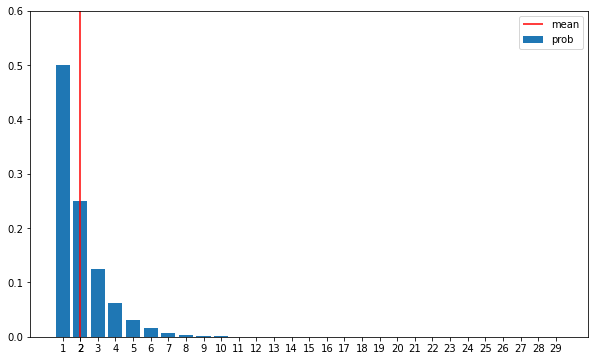

In [55]:
#Í∑∏ÎûòÌîÑ
plot_prob(X)

#### * scipy.statsÏóê ÏûàÎäî Í∏∞ÌïòÎ∂ÑÌè¨Ïùò (geom)Ìï®Ïàò ÏÇ¨Ïö©ÌïòÍ∏∞

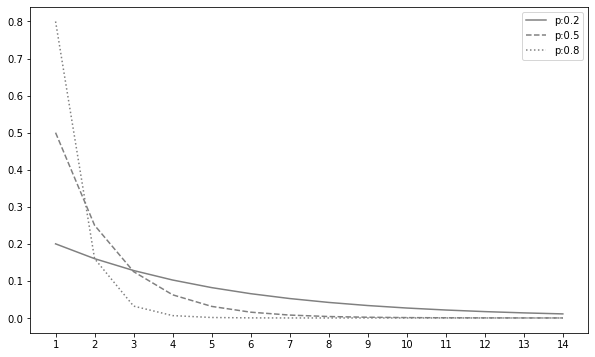

In [51]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

### 4.Ìè¨ÌïòÏÜ° Î∂ÑÌè¨(poisson distributuin)

In [57]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [58]:
lam = 3
X = Poi(lam)

In [59]:
#Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞
check_prob(X)

Í∏∞ÎåÄÍ∞í E(X): 3.0
Î∂ÑÏÇ∞   V(X): 3.0


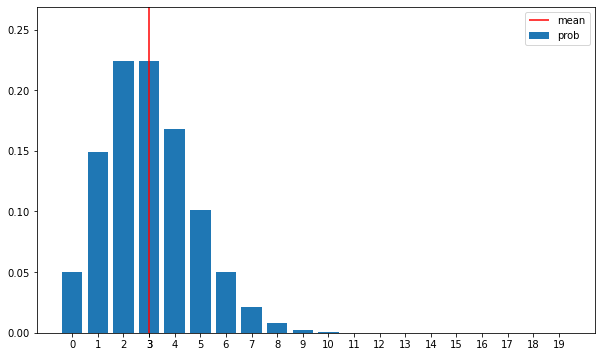

In [60]:
#Í∑∏ÎûòÌîÑ
plot_prob(X)

#### * scipy.statsÏóê ÏûàÎäî Í∏∞ÌïòÎ∂ÑÌè¨Ïùò (poisson)Ìï®Ïàò ÏÇ¨Ïö©ÌïòÍ∏∞

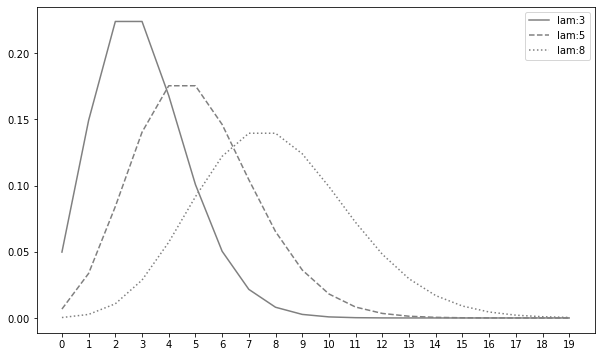

In [61]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

## 2.Ïó∞ÏÜçÌôïÎ•†Î∂ÑÌè¨

### Ïó∞ÏÜçÌôïÎ•†Î≥ÄÏàòÏóêÏÑú Îã§Î£¨ ÎÇ¥Ïö©(Ìï®Ïàò)

- ÏÉÅÌÉúÍµ¨Í∞Ñ

In [2]:
x_range = np.array([0,4])
x_range

array([0, 4])

- ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò

In [3]:
def f(x):
    if x_range[0] < x <= x_range[1]:
        return (1/8*x)
    else:
        return 0

- ÌôïÎ•†Î≥ÄÏàò

In [4]:
X = [x_range, f]

- ÌôïÎ•†(Î©¥Ï†Å) Íµ¨ÌïòÍ∏∞

In [5]:
from scipy import integrate

integrate.quad(f, 2, 3)  #f:ÌîºÏ†ÅÎ∂ÑÌï®Ïàò, 2,3: Ï†ÅÎ∂ÑÎ≤îÏúÑ   
#Í≤∞Í≥ºÍ∞í: (0.3125, 3.469446951953614e-15)=(Ï†ÅÎ∂ÑÍ∞í, Ï∂îÏ†ïÏò§Ï∞®)

(0.3125, 3.469446951953614e-15)

- Í∏∞ÎåÄÍ∞í:ÌèâÍ∑†

In [6]:
def E(X, g=lambda x:x):
    x_range, f = X
    
    def integrand(x):
        return g(x) * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]

E(X)

2.66666666666506

- Î∂ÑÏÇ∞

In [7]:
def V(X, g=lambda x:x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x)-mean)**2 * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]

V(X)

0.8888888888899126

In [8]:
def check_prob(X):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf), 4)
    
    print(f'Í∏∞ÎåÄÍ∞í E(X): {E(X):.4}')
    print(f'Î∂ÑÏÇ∞   V(X): {V(X):.4}')    
    
check_prob(X)

Í∏∞ÎåÄÍ∞í E(X): 2.667
Î∂ÑÏÇ∞   V(X): 0.8889


- ÌôïÎ•†

In [24]:
def get_prob(X, a, b):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, a, b), 4)
    
    print(f'ÌôïÎ•†: {prob_sum[0]}')

- ÎàÑÏ†ÅÎ∂ÑÌè¨Ìï®Ïàò

In [9]:
def F(x):
    return integrate.quad(f,-np.inf, x)[0]    #(-np.inf, np.inp: Î¨¥ÌïúÎåÄ)

F(3) - F(2)

0.3124999999999945

- Í∑∏ÎûòÌîÑ(Íµ¨Í∞Ñ ÏÉâÏπ†ÌïòÍ∏∞)

In [10]:
def plot_prob(X, x_min, x_max):
    x_range, f = X
    
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
        
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    
    
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray', linestyle='--')
    ax.legend()

    plt.show()   


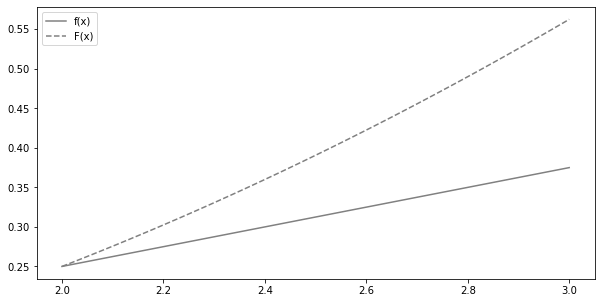

In [11]:
plot_prob(X, 2, 3)

### 1. Ï†ïÍ∑úÎ∂ÑÌè¨

In [51]:
#ùëç ~ N(0,1) Ï†ïÍ∑úÌôîÎ•º Îî∞Î•∏ Ï†ïÍ∑úÎ∂ÑÌè¨
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [52]:
#X ~ N(2, 0.5^2 )
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [53]:
#Í∏∞ÎåÄÍ∞íÍ≥º Î∂ÑÏÇ∞
check_prob(X)

Í∏∞ÎåÄÍ∞í E(X): 2.0
Î∂ÑÏÇ∞   V(X): 0.25


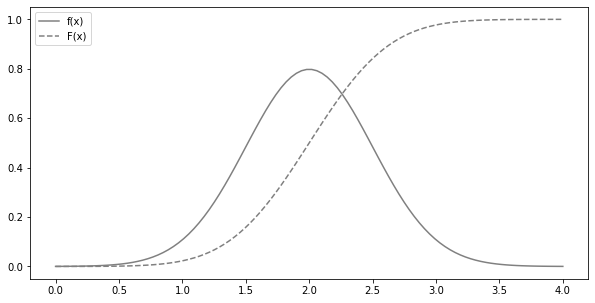

In [54]:
#Ï†ïÍ∑úÎ∂ÑÌè¨ Í∑∏ÎûòÌîÑ: P(a <= X <= b) , a=0, b=4
plot_prob(X, 0, 4)

#### * scipy.statsÏóê ÏûàÎäî Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò (norm)Ìï®Ïàò ÏÇ¨Ïö©ÌïòÍ∏∞

In [56]:
from scipy import stats

rv = stats.norm(2, 0.5)

In [57]:
rv.mean(), rv.var()

(2.0, 0.25)

In [58]:
#ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò
rv.pdf(2)   

0.7978845608028654

In [59]:
#ÌôïÎ•†Î∂ÑÌè¨Ìï®Ïàò : P(X<=x) 
rv.cdf(1.7)

0.27425311775007355

In [60]:
#ÏÉÅÏúÑ 100ùõº"%" Ï†ê:Zùõº Ïù∏ Íº¨Î¶¨ÌôïÎ•†: Î∞±Î∂ÑÏúÑÏàòÎ•º Za Î°ú ÌëúÏãú
rv.isf(0.3)   #ÏÉÅÏúÑ 30%Ïù∏ Ï†ê

2.2622002563540207

In [61]:
#ÌôïÎ•†Ïù¥ aÍ∞Ä ÎêòÎäî Í∞ÄÏö¥Îç∞ Î∂ÄÎ∂ÑÏùò Íµ¨Í∞Ñ(Î©¥Ï†Å)
rv.interval(0.9)   # 90%Íµ¨Í∞Ñ

#Ïò§Î•∏Ï™ΩÍ≥º ÏôºÏ™Ω 5%Ïî© ÎÇ®Îäî Íµ¨Í∞ÑÍ≥º Í∞ôÎã§.
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

#### [ÏòàÏ†ú] 

In [62]:
mu, sigma = 20, 4
X = N(mu, sigma)

In [63]:
#ÌôïÎ•†ÏùÄ
get_prob(X, 14, 25)

ÌôïÎ•†: 0.8275
